# Dérivation et intégration numérique



## Introduction

Cette séquence aborde le thème des dérivations et intégrations numériques, outils essentiels en physique. Il n'est pas toujours possible d'obtenir une fonction analytique pour représenter un phénomène physique. Il est donc souvent nécessaire de calculer dérivées et intégrales approximativement, par des méthodes numériques.

Pour rappel, on définit mathématiquement la dérivée d'une fonction dérivable par :

$$
f'(x) = \lim_{h \to 0} \frac{f(x+h)-f(x)}{h}
$$

On définit également l'intégrale d'une fonction intégrable sur un intervalle $[a,b]$ par :

$$
I(f) = \int_{a}^{b} f(x)\mathrm{d}x = F(b)-F(a)
$$

où $F$ est une primitive de $f$.

## Dérivation numérique

En physique numérique, les données sont en général sous forme de listes de points ayant une ou plusieurs coordonnées, par exemple des points de coordonnées $\{(x_i,y_i)\}$, $x$ et $y$ pouvant représenter deux grandeurs physiques (temps, position, vitesse, courant, tension, etc.) On ne peut donc pas faire tendre l'intervalle entre deux points vers zéro comme on le fait conceptuellement en mathématique.

Nous allons donc faire des approximations. Une première approximation est d'associer la dérivée d'une courbe représentée par un ensemble de points par la pente entre deux points.

$$
y'_i = \frac{y_{i+1}-y_{i}}{x_{i+1}-x_{i}}
$$

Nous allons ci-dessous calculer cette approximation en un point précis d'une courbe.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Exemple 
# On commence par créer des points de données
x = np.arange(0, 5.1, 0.5)
y = np.cos(x)

plt.plot(x, y, '+')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.25, 1.25) # Pour faire joli
plt.grid()
plt.show()

In [ ]:
# On prend un point (x_i, y_i) de la liste, par exemple i = 3

i = 3
derivee = (y[i + 1] - y[i]) / (x[i + 1] - x[i])
print('Point de coordonnées x =', x[i], ', y= cos(x) =', y[i])
print('Dérivée approximative dy/dx =', derivee)
print("Dérivée analytique -sin(x) =", -np.sin(x[i]))

In [ ]:
# En bonus, on peut tracer la droite ayant comme pente la dérivée calculée
# passant par le point de coordonées (x_i, y_i)
# et la comparer à la tangente calculée analytiquement

i = 3
derivee = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

# On crée la droite donnée par la dérivée approximative, à partir des points {x}
tangente_appro = (x - x[i]) * derivee + y[i]

# On crée la droite donnée par la dérivée analytique au point (x[i], y[i])
tangente_vraie = (x - x[i]) * (-np.sin(x[i])) + y[i]

plt.plot(x, y, '+', label = 'cos(x)')
plt.plot(x[i], y[i], 'o') # Juste pour mettre en valeur le point considéré
plt.plot(x, tangente_appro, '-', label = "tangente approx")
plt.plot(x, tangente_vraie, '--', label = "tangente analytique")
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.25, 1.25) # Restreint l'échelle des ordonnées autour des données de cos(x)
plt.legend()
plt.grid()
plt.show()

### Exercice
- Dans le programme ci-dessus, essayez de changer la valeur de i entre 0 et 11
- Est-ce que ça marche aussi bien pour tous les points ? Pourquoi ?

Pour calculer la dérivée pour tous les points (ou presque), on utilise une boucle `for` :

In [ ]:
# On commence par initialiser le tableau 
# Attention ! La boucle for ne peut calculer que n - 1 points car x[n] n'existe pas !
derivee = np.zeros(len(x) - 1)

for i in range(len(x) - 1): 
    derivee[i] = (y[i + 1] - y[i]) / (x[i + 1] - x[i])

# On trace la fonction
plt.plot(x, y, '+', label = 'cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.ylim(-1.25, 1.25) # Pour faire joli
plt.xlim(-0.25, 5.25) # Pour faire joli
plt.grid()
plt.show()

# Puis on trace sa dérivée sur un autre graphe
xn = x[:-1]
plt.plot(xn, derivee, '+', label = 'dérivée numérique')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.ylim(-1.25, 1.25) # Pour faire joli
plt.xlim(-0.25, 5.25) # Pour faire joli
plt.grid()

# On peut comparer à la solution analytique de la dérivée
xa = np.arange(0, 5.1, 0.01)
plt.plot(xa, -np.sin(xa), label = 'dérivée analytique')
plt.plot(xn, derivee - (-np.sin(xn)), 'o--', label = 'erreur')
plt.legend()
plt.show()

# Notez que le graphe de la dérivée numérique a bien un point de moins que la fonction, en x = 5.

## Integration numérique

Rappelons tout d'abord que l'intégrale d'une courbe entre deux bornes $[a,b]$ est égale à l'aire *sous* la courbe (en grisé dans le schéma ci-dessous), c'est-à-dire l'aire de la forme délimitée par l'axe des abscisses en bas, la courbe en haut, et les droites verticales passant par les bornes $a$ et $b$ à gauche et à droite. Cette aire est considérée comme *positive* si la fonction est positive, et *négative* si la fonction est négative dans les bornes considérées.

Il existe plusieurs méthodes numériques pour calculer approximativement une intégrale. Nous allons en présenter une ici, vous en verrez d'autres dans les exercices.

### Méthode des rectangles

L'approximation la plus simple est appelée "méthode des rectangles" elle est illustrée dans la figure suivante. Pour une fonction intégrable $f$, on cherche à calculer l'intégrale suivante :
$$
I(f) = \int_{a}^{b} f(x)\mathrm{d}x 
$$

on choisit de discrétiser l'intervalle $[a,b]$ en $n$ intervalles de même longueur, repérés par les points $x_i = a+i\times\Delta x$ avec $\Delta x=\frac{b-a}{n}$ . Une approximation de l'intégrale $I(f)$ est donnée par :
$$
I(f) \approx  I_n(f) = \sum_{i=0}^{n-1} f(x_i)\Delta x 
$$

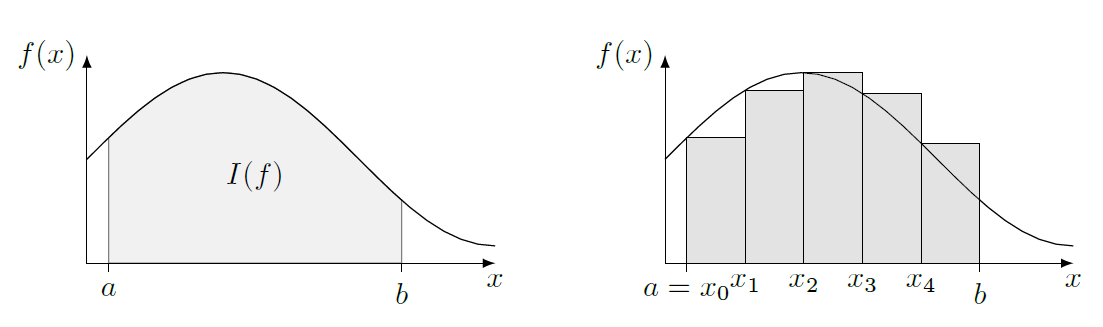

En exemple, nous allons calculer l'intégrale de $f(x) = \cos(x)$ entre $0$ et $\frac{\pi}{4}$.

In [ ]:
# Bornes d'intégration [a, b]
a = 0
b = np.pi / 4

# Calcul du pas d'intégration 
n = 1000 # Nombre de pas
Delta_x = (b - a) / n

# Initialisation de la somme à zéro
integrale = 0 

# On ajoute ensuite chaque terme de la somme par une boucle for
for i in range(n):
    # Valeur de la fonction en (a + i * Delta_x)
    f_xi = np.cos(a + i * Delta_x)
    # Aire approximative sous la courbe entre (a + i * Delta_x) et (a + (i + 1) * Delta_x)
    aire = f_xi * Delta_x
    # Somme des aires
    integrale = integrale + aire

# Calculons aussi le résultat analytique pour comparer
integralevraie = np.sin(b) - np.sin(a)
    
print('approximation \t', integrale)
print('analytique \t', integralevraie)

### Exercice
Faites varier le nombre de pas dans le code ci-dessus. Que remarquez-vous ?

## Travail préparatoire
Pour préparer la séance en présentiel, vous dériverez analytiquement et trouverez les primitives des fonctions suivantes, en précisant leurs intervalles de définition :

$$
f(x) = \frac{1-x^2}{x^4+2x^2+1} 
$$

$$
g(x) = \tan(x)
$$

$$
h(x) = \frac{1}{1+e^{-x}} = \frac{e^x}{e^{x} + 1}
$$


Puis utilisez les modules `numpy` et `matplotlib.pyplot` pour tracer ces fonctions sur un intervalle approprié.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fonctions demandées

def f(x): # Intervalle R
    return (1 - x ** 2) / (x ** 4 + 2 * x ** 2 + 1)

def g(x): # Intervalle -pi / 2, +pi / 2
    return np.tan(x)

def h(x): # Intervalle R
    return 1 / (1 + np.exp(-x))

# Dérivées

def fprime(x):
    return 2 * x * (x ** 2 - 3) / (x ** 2 + 1) ** 3

def gprime(x):
    return 1 + np.tan(x) ** 2

def hprime(x):
    return np.exp(-x) / (1 + np.exp(-x)) ** 2

# Primitives

def F(x):
    return (x ** 2 + x + 1) / (x ** 2 + 1)

def G(x):
    return -np.log(np.cos(x))

def H(x):
    return np.log(1 + np.exp(x))

In [ ]:
# Plot des f, f' et F
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x), label = '$f$')
plt.plot(x, fprime(x), label = "$f'$")
plt.plot(x, F(x), label = '$F$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.show()

In [ ]:
# Plot des g, g' et G
x = np.linspace(-np.pi / 2 + 0.0001, np.pi / 2 - 0.0001, 100)
plt.plot(x, g(x), label = '$g$')
plt.plot(x, gprime(x), label = "$g'$")
plt.plot(x, G(x), label = '$G$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.ylim(-10, 10)
plt.show()

In [ ]:
# Plot des h, h' et H
x = np.linspace(-5, 5, 100)
plt.plot(x, h(x), label = '$h$')
plt.plot(x, hprime(x), label = "$h'$")
plt.plot(x, H(x), label = '$H$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.ylim(-0.5, 2.5)
plt.show()